# CelebA 人脸图像数据下载

In [1]:
import torchvision.datasets

In [2]:
# 下载
# mnist_dataset = torchvision.datasets.CelebA(root='.', download=True)

In [3]:
import h5py
import zipfile
import imageio.v3 as iio
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
# 生成分成结构数据格式
hdf5_file = r".//celeba//celeba_aligned_small.h5py"
celebadat = r".//celeba//img_align_celeba.zip"
# print(os.path.exists(celebadat))
# 从 202,599 个图像中提取一部分图像进行训练
total_images = 20000    # 设定训练数据集的大小
if not os.path.exists(hdf5_file):
    with h5py.File(hdf5_file, "w") as hf:

        count = 0

        with zipfile.ZipFile(celebadat, "r") as zf:
            # ofile = zf.extract("img_align_celeba/000001.jpg")
            # img = imageio.imread(ofile)
            
            for i in zf.namelist():
                # print(i)
                if i[-4:] == ".jpg":
                    ofile = zf.extract(i)   # 解压单个文件，返回文件绝对路劲
                    img = iio.imread(ofile) # 读取文件数据
                    os.remove(ofile)        # 移除文件 

                    count += 1
                    
                    # 创建一个数据集用gzip方式压缩，compression_opts设置--越大压缩越多
                    hf.create_dataset('img_align_celeba/'+str(count)+'.jpg', data=img, compression="gzip", compression_opts=9)
                    
                    

                    if (count%1000 == 0):
                        print("images done .. ", count)

                    if (count == total_images):
                        break

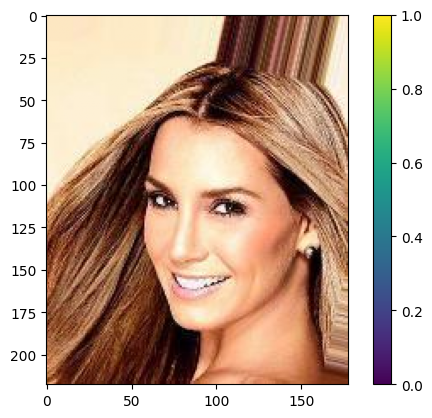

In [17]:
f = h5py.File(hdf5_file, "r")
im = np.array(f["img_align_celeba"]["1.jpg"])/255
# print(im)
# print(im.reshape(3,218,178))
# im=im.reshape(3,218,178)
# im = im.transpose(2,0,1).reshape(218,178,3)
ims = plt.imshow(im)
plt.colorbar(ims)
# print(torch.FloatTensor(np.array(f["img_align_celeba"]["1.jpg"])))
f.close()